In [1]:
# Setup & Imports
import os
import pandas as pd
import snowflake.connector
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# Load credentials from .env
load_dotenv()

# Matplotlib/Seaborn styling
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [2]:
# Connect to Snowflake
conn = snowflake.connector.connect(
    user=os.getenv("SNOWFLAKE_USER"),
    password=os.getenv("SNOWFLAKE_PASSWORD"),
    account=os.getenv("SNOWFLAKE_ACCOUNT"),
    warehouse=os.getenv("SNOWFLAKE_WAREHOUSE"),
    database=os.getenv("SNOWFLAKE_DATABASE"),
    schema=os.getenv("SNOWFLAKE_SCHEMA")
)
cur = conn.cursor()

In [3]:
# Helper function to fetch query into DataFrame
def fetch_df(query):
    cur.execute(query)
    return pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])

Top 10 campaigns by spend (last 14 days):


,CAMPAIGN_ID,TOTAL_SPEND
0,24,23761.17
1,49,23457.45
2,38,23361.53
3,34,23213.83
4,7,23189.40
5,43,23130.21
6,10,23078.06
7,28,23007.20
8,47,22897.33
9,27,22892.35


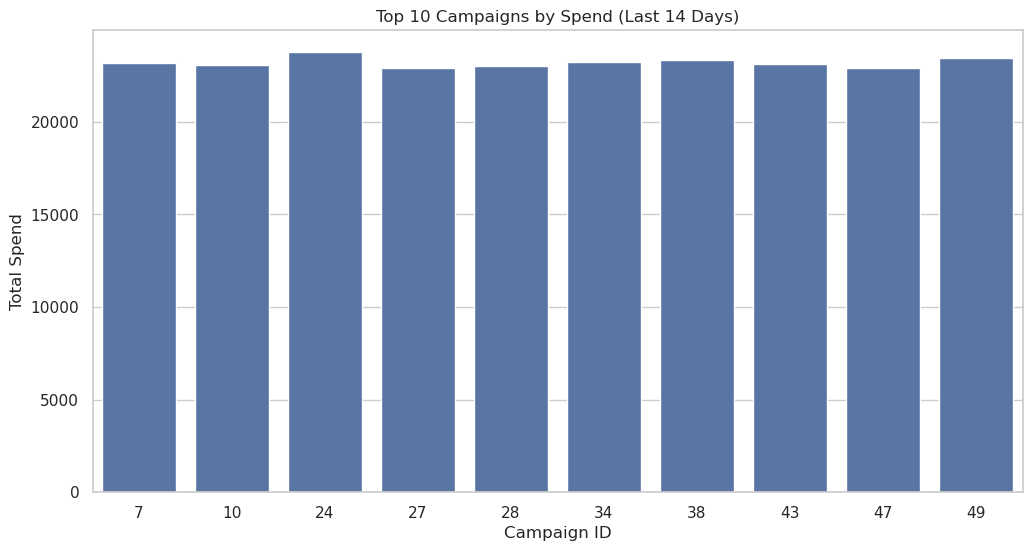

In [4]:
# Top 10 Campaigns by Spend (Last 14 Days)
top_campaigns_query = """
SELECT CAMPAIGN_ID, SUM(SPEND) AS TOTAL_SPEND
FROM CURATED.CAMPAIGN_DAILY_METRICS
WHERE DT >= DATEADD('day', -14, CURRENT_DATE)
GROUP BY CAMPAIGN_ID
ORDER BY TOTAL_SPEND DESC
LIMIT 10
"""
top_campaigns = fetch_df(top_campaigns_query)
print("Top 10 campaigns by spend (last 14 days):")
display(top_campaigns)

# Plot top 10 campaigns by spend
# Default colors
sns.barplot(data=top_campaigns, x="CAMPAIGN_ID", y="TOTAL_SPEND")
plt.title("Top 10 Campaigns by Spend (Last 14 Days)")
plt.xlabel("Campaign ID")
plt.ylabel("Total Spend")
plt.show()

Daily CTR trend:


,DT,AVG_CTR
0,2025-06-30,0.099075
1,2025-07-01,0.098478
2,2025-07-02,0.103829
3,2025-07-03,0.102385
4,2025-07-04,0.101698
5,2025-07-05,0.099310
6,2025-07-06,0.103878
7,2025-07-07,0.095640
8,2025-07-08,0.095550
9,2025-07-09,0.101964


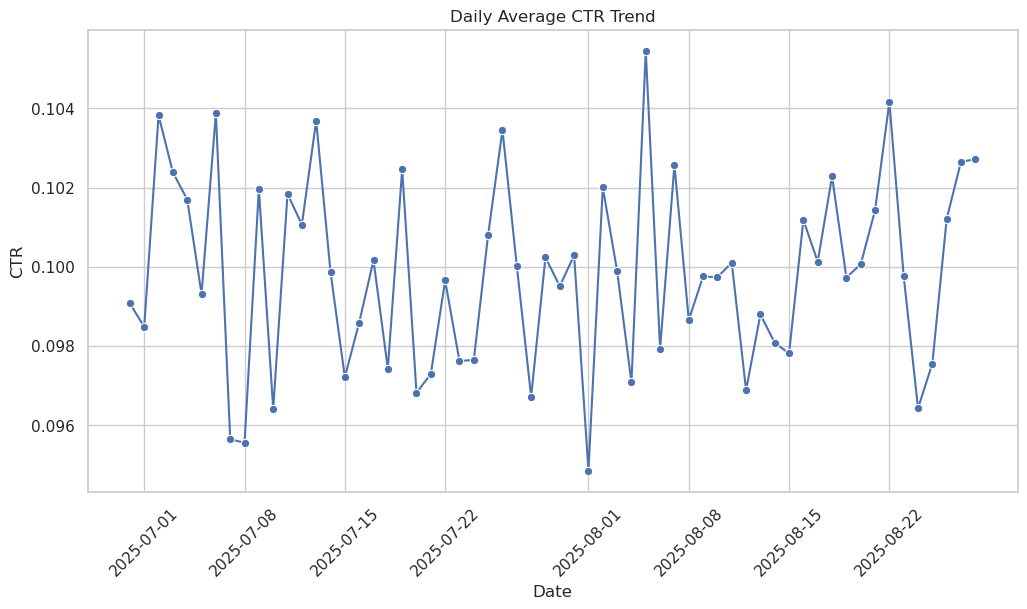

In [5]:
# Daily CTR Trend
ctr_trend_query = """
SELECT DT, AVG(CTR) AS AVG_CTR
FROM CURATED.CAMPAIGN_DAILY_METRICS
GROUP BY DT
ORDER BY DT
"""
ctr_trend = fetch_df(ctr_trend_query)
print("Daily CTR trend:")
display(ctr_trend)

# Plot
sns.lineplot(data=ctr_trend, x="DT", y="AVG_CTR", marker="o")
plt.title("Daily Average CTR Trend")
plt.xlabel("Date")
plt.ylabel("CTR")
plt.xticks(rotation=45)
plt.show()

Top 10 creatives by impressions:


,CREATIVE_ID,IMPRESSIONS,CLICKS,AVG_CPC
0,2,41291499,4107411,1.730789720894
1,3,41249488,4131062,1.709200986029
2,1,41225154,4115816,1.720820878909


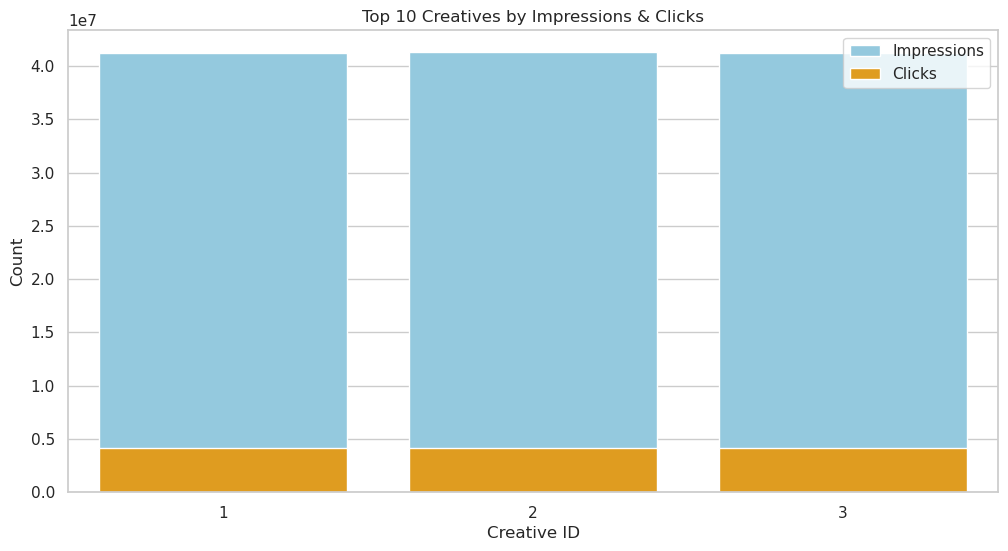

In [6]:
# Top 10 Creatives by Impressions
top_creatives_query = """
SELECT CREATIVE_ID, SUM(IMPRESSIONS) AS IMPRESSIONS, SUM(CLICKS) AS CLICKS, AVG(CPC) AS AVG_CPC
FROM CURATED.CAMPAIGN_DAILY_METRICS
GROUP BY CREATIVE_ID
ORDER BY IMPRESSIONS DESC
LIMIT 10
"""
top_creatives = fetch_df(top_creatives_query)
print("Top 10 creatives by impressions:")
display(top_creatives)

# Plot impressions & clicks
sns.barplot(data=top_creatives, x="CREATIVE_ID", y="IMPRESSIONS", color="skyblue", label="Impressions")
sns.barplot(data=top_creatives, x="CREATIVE_ID", y="CLICKS", color="orange", label="Clicks")
plt.title("Top 10 Creatives by Impressions & Clicks")
plt.xlabel("Creative ID")
plt.ylabel("Count")
plt.legend()
plt.show()

In [7]:
# Close connection
cur.close()
conn.close()